In [1]:
import pandas as pd
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import time

import os

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [98]:
data = pd.read_csv("covid_19_data.csv")

In [99]:
data = data.drop(labels = ["Province/State"],axis=1)
data

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18322,18323,04/24/2020,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


In [100]:
data = data.iloc[:,1:]

In [135]:
df = data.copy()

In [111]:
df

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...
18322,04/24/2020,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,04/24/2020,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,04/24/2020,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,04/24/2020,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


In [147]:
dt

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...
18322,04/24/2020,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,04/24/2020,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,04/24/2020,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,04/24/2020,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


In [128]:
df.iloc[4].loc["Last Update"]

'1/22/2020 17:00'

In [75]:
df = df.groupby(["Country/Region","ObservationDate","Last Update"]).sum()

In [54]:
df.iloc[0]

Confirmed    1.0
Deaths       0.0
Recovered    0.0
Name: ( Azerbaijan, 02/28/2020, 2020-02-28T15:03:26), dtype: float64

Country/Region
 Azerbaijan                       AxesSubplot(0.125,0.125;0.775x0.755)
('St. Martin',)                   AxesSubplot(0.125,0.125;0.775x0.755)
Afghanistan                       AxesSubplot(0.125,0.125;0.775x0.755)
Albania                           AxesSubplot(0.125,0.125;0.775x0.755)
Algeria                           AxesSubplot(0.125,0.125;0.775x0.755)
                                                  ...                 
Western Sahara                    AxesSubplot(0.125,0.125;0.775x0.755)
Yemen                             AxesSubplot(0.125,0.125;0.775x0.755)
Zambia                            AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe                          AxesSubplot(0.125,0.125;0.775x0.755)
occupied Palestinian territory    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Confirmed, Length: 220, dtype: object

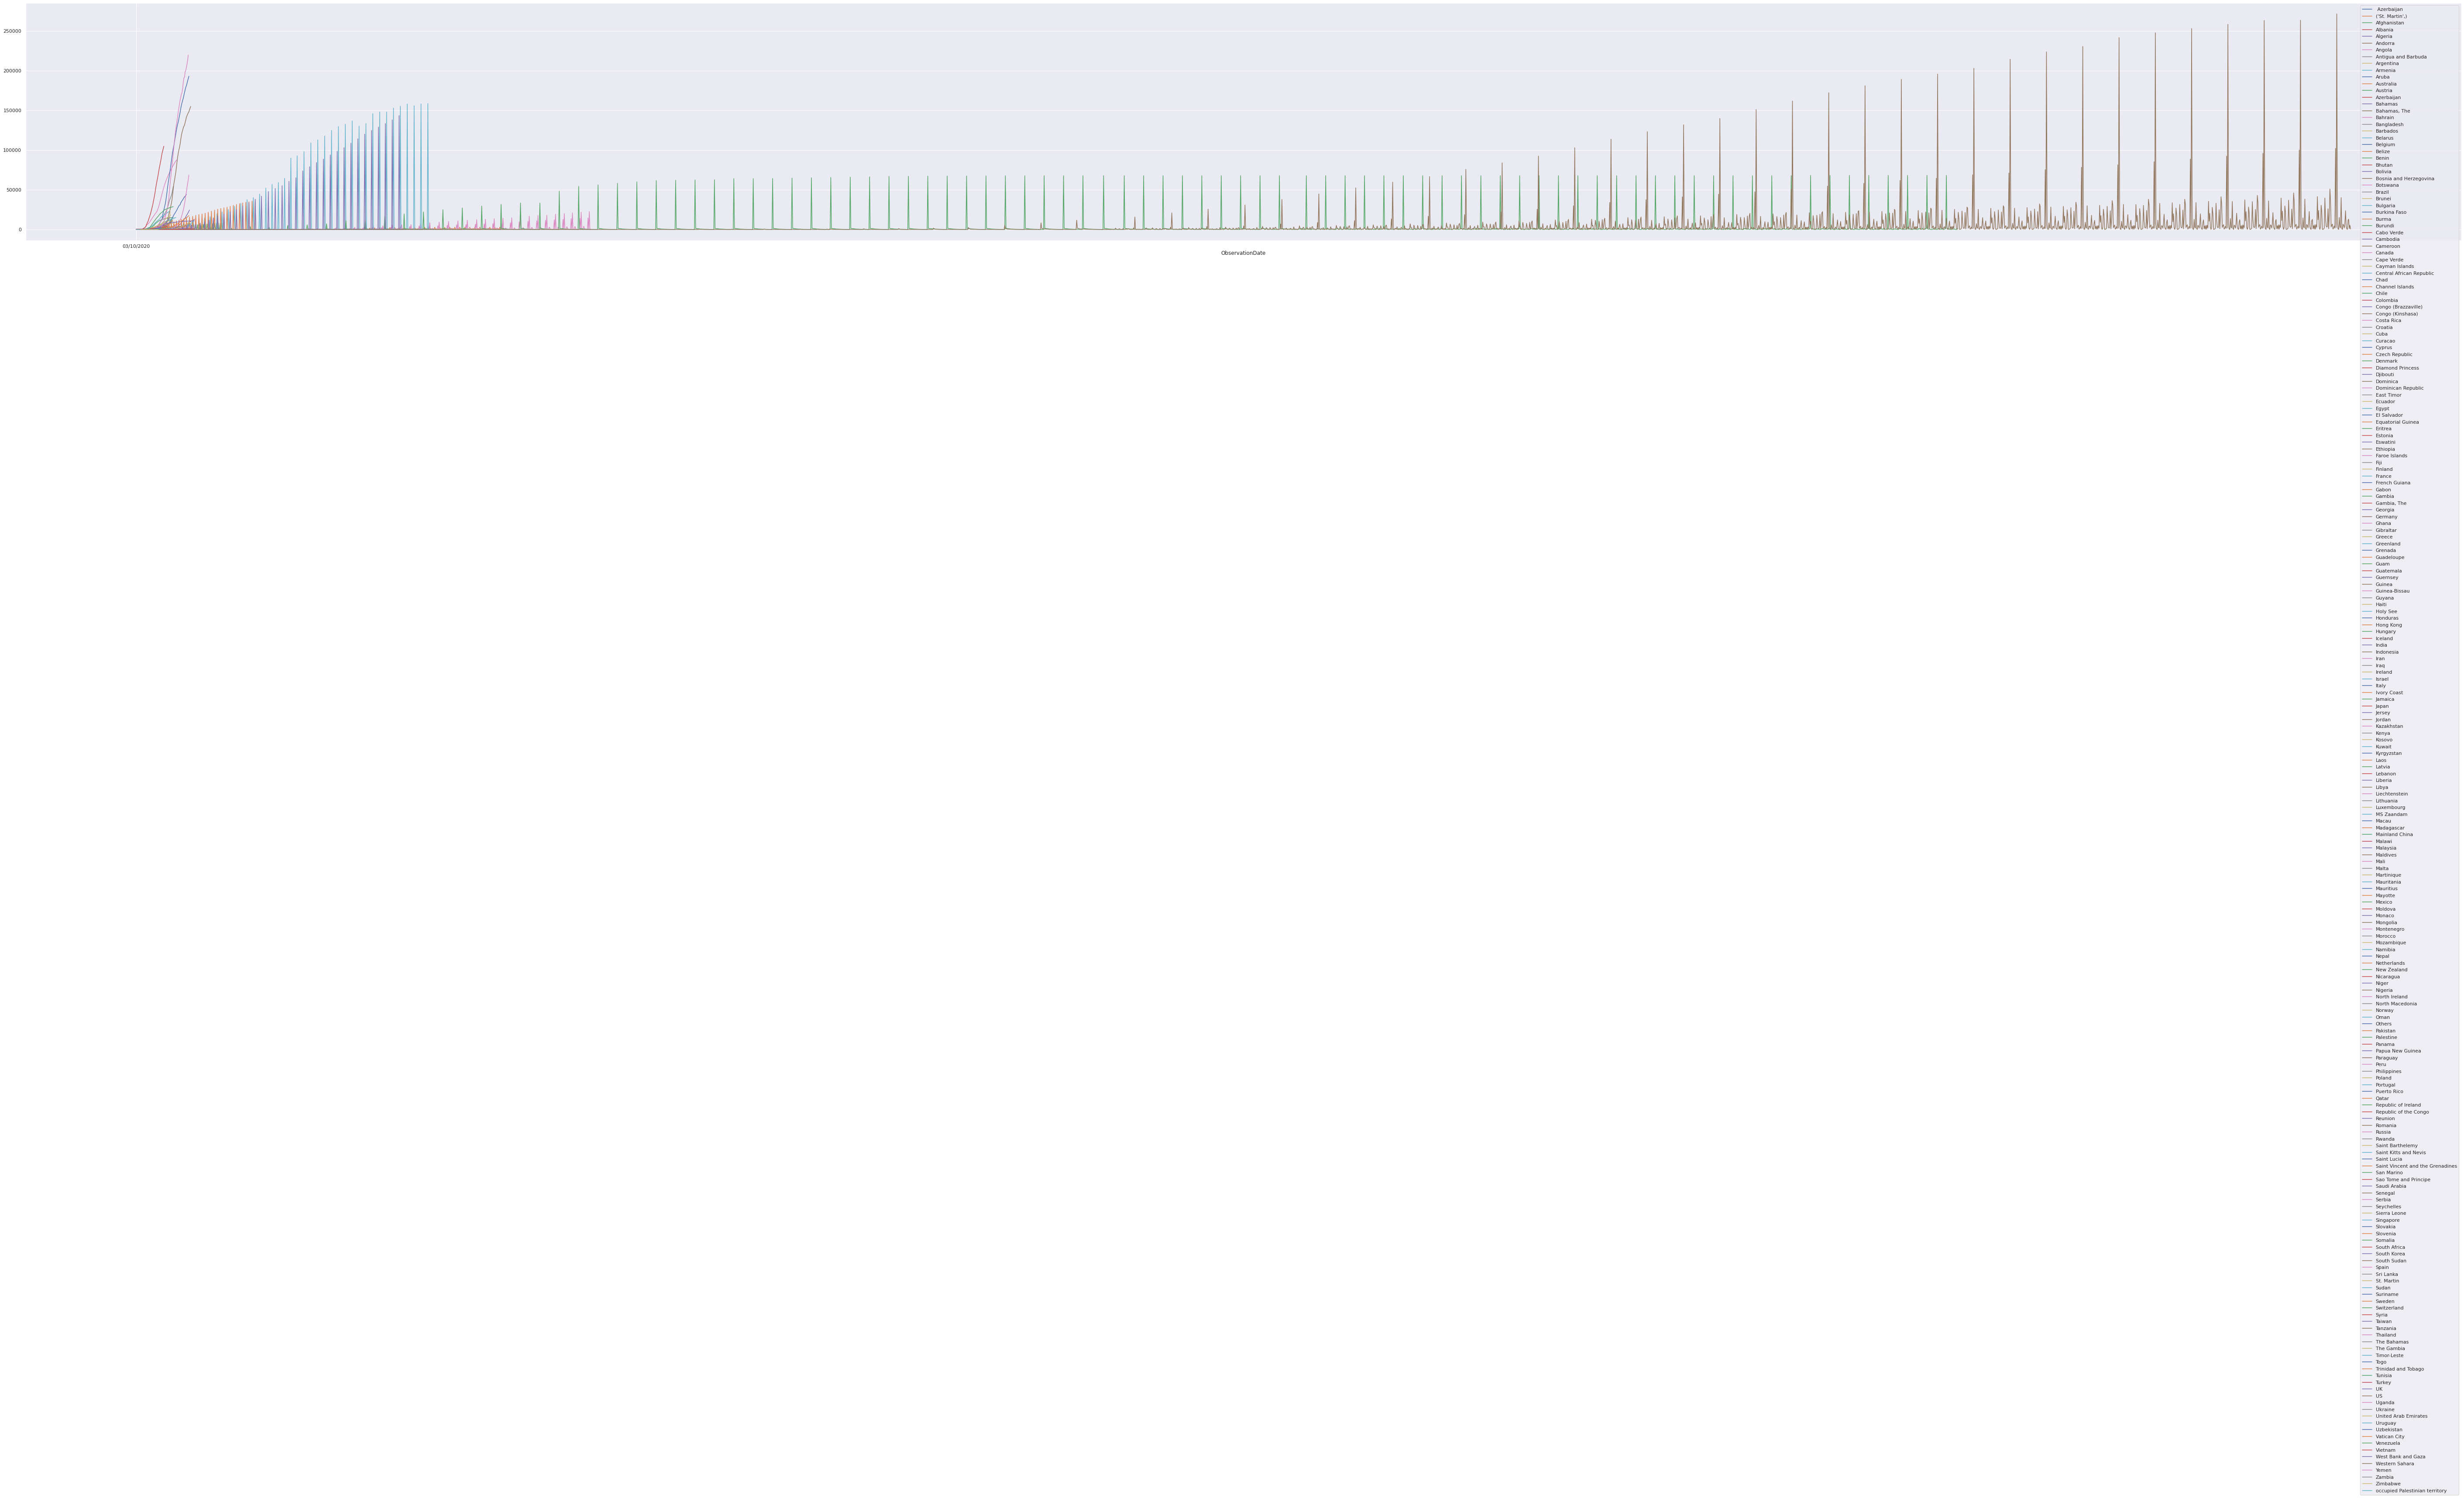

In [105]:
df.set_index('ObservationDate', inplace=True)
df.groupby('Country/Region')['Confirmed'].plot.line(figsize=(100,10),legend=True)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text major ticklabel objects>)

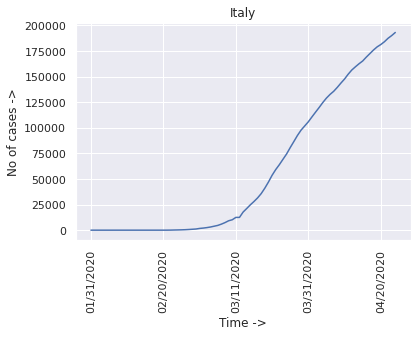

In [251]:
dt = df.copy()
k = "Italy"
dt = dt[dt["Country/Region"] == k]
dt.set_index('ObservationDate', inplace=True)
dt.groupby('Country/Region')['Confirmed'].plot.line()
plt.title(k)
plt.xlabel("Time ->")
plt.ylabel("No of cases ->",rotation=90)
plt.xticks(rotation=90)

In [252]:
dt

,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,
01/31/2020,Italy,1/31/2020 23:59,2.0,0.0,0.0
02/01/2020,Italy,1/31/2020 8:15,2.0,0.0,0.0
02/02/2020,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
02/03/2020,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
02/04/2020,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
...,...,...,...,...,...
04/20/2020,Italy,2020-04-20 23:44:50,181228.0,24114.0,48877.0
04/21/2020,Italy,2020-04-21 23:39:09,183957.0,24648.0,51600.0
04/22/2020,Italy,2020-04-22 23:38:57,187327.0,25085.0,54543.0


In [253]:
dt = dt.drop(labels=["Country/Region"],axis = 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

covid_training_scaled = dt_train
covid_training_scaled = scaler.fit_transform(dt_train[["Confirmed","Deaths","Recovered"]])

In [254]:
dt_train = dt[0:int(len(dt)*0.75)]
dt_test = dt[int(len(dt)*0.75):]

Training


In [246]:
len(dt_train)

63

In [255]:
dt_test

,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,
04/03/2020,2020-04-03 22:52:45,119827.0,14681.0,19758.0
04/04/2020,4/4/20 9:38,124632.0,15362.0,20996.0
04/05/2020,2020-04-05 23:13:44,128948.0,15887.0,21815.0
04/06/2020,4/6/20 9:37,132547.0,16523.0,22837.0
04/07/2020,2020-04-07 23:11:31,135586.0,17127.0,24392.0
04/08/2020,2020-04-08 22:59:00,139422.0,17669.0,26491.0
04/09/2020,2020-04-09 23:09:19,143626.0,18279.0,28470.0
04/10/2020,2020-04-10 23:01:43,147577.0,18849.0,30455.0
04/11/2020,2020-04-11 22:52:46,152271.0,19468.0,32534.0


In [258]:
features_set = []
labels = []
for i in range(17, len(covid_training_scaled)):
    features_set.append(covid_training_scaled[i-17:i, 1:])
    labels.append(covid_training_scaled[i, 1:])

features_set, labels = np.array(features_set), np.array(labels)

In [265]:
covid_training_scaled[0][0]

0.0

In [259]:
features_set.shape

(46, 17, 2)

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout


In [268]:
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(features_set.shape[1], 2)))
model.add(Dropout(0.2))
model.add(LSTM(units=10, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=10, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=10))
model.add(Dropout(0.2))

model.add(Dense(units=2))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [269]:
model.fit(features_set, labels, epochs = 100, batch_size = 5)

Epoch 1/100
10/10 [==============================] - 0s 23ms/step - loss: 0.1122
Epoch 2/100
10/10 [==============================] - 0s 26ms/step - loss: 0.0856
Epoch 3/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0709
Epoch 4/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0472
Epoch 5/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0270
Epoch 6/100
10/10 [==============================] - 0s 25ms/step - loss: 0.0224
Epoch 7/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0119
Epoch 8/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0138
Epoch 9/100
10/10 [==============================] - 0s 25ms/step - loss: 0.0100
Epoch 10/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0170
Epoch 11/100
10/10 [==============================] - 0s 25ms/step - loss: 0.0101
Epoch 12/100
10/10 [==============================] - 0s 25ms/step - loss: 0.0086
Epoch 13/100
10/10 [=====

In [267]:
len(dt)

85

Testing

In [273]:
dt_test_2 = scaler.fit_transform(dt_test[["Confirmed","Deaths","Recovered"]])

test_set = []
test_labels = []
for i in range(17, len(dt_test_2)):
    test_set.append(dt_test_2[i-17:i, 1:])
    test_labels.append(dt_test_2[i, 1:])

test_set, test_labels = np.array(test_set), np.array(test_labels)

test_set = np.reshape(test_set, (test_set.shape[0], test_set.shape[1], 2))

In [274]:
predictions = model.predict(test_set)


In [275]:
predictions = scaler.inverse_transform(predictions)

ValueError: ignored

In [276]:
predictions

array([[0.78910327, 0.7647689 ],
       [0.8524586 , 0.82818264],
       [0.8997596 , 0.87590814],
       [0.9371521 , 0.91375273],
       [0.96645075, 0.9434135 ]], dtype=float32)

TypeError: ignored

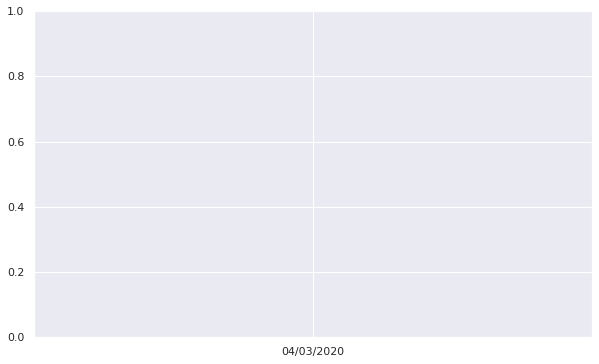

In [277]:
plt.figure(figsize=(10,6))
plt.plot(dt_test, color='blue', label='Actual ')
plt.plot(predictions , color='red', label='Predicted ')
plt.title('Time series Prediction')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [214]:
predictions

array([[0.00429139],
       [0.00429404],
       [0.0042969 ],
       [0.00429988],
       [0.00430286],
       [0.00430667],
       [0.00431439],
       [0.00433442],
       [0.00437808],
       [0.00446802],
       [0.00463066],
       [0.00490189],
       [0.00532818],
       [0.00596604],
       [0.00689413],
       [0.00820631],
       [0.01000929],
       [0.01242255],
       [0.015582  ],
       [0.01963615],
       [0.02475818],
       [0.03115278],
       [0.03901497],
       [0.04850818],
       [0.05973849],
       [0.0728976 ],
       [0.08812368],
       [0.10553804],
       [0.12518278],
       [0.14712223],
       [0.17134428],
       [0.19717821],
       [0.22488295],
       [0.25401384],
       [0.28415924],
       [0.3148685 ],
       [0.34589   ],
       [0.3766054 ],
       [0.40676978],
       [0.4362108 ],
       [0.46533003],
       [0.49346513],
       [0.5214354 ],
       [0.5476066 ],
       [0.57296246],
       [0.59766996],
       [0.6219046 ],
       [0.645

In [215]:
len(predictions)

68